# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Function to unpickle given dataset

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loading the cifar-10 dataset

In [3]:
dict1=unpickle("/content/drive/My Drive/cifar-10-batches-py/data_batch_1")
dict2=unpickle("/content/drive/My Drive/cifar-10-batches-py/data_batch_2")
dict3=unpickle("/content/drive/My Drive/cifar-10-batches-py/data_batch_3")
dict4=unpickle("/content/drive/My Drive/cifar-10-batches-py/data_batch_4")
dict5=unpickle("/content/drive/My Drive/cifar-10-batches-py/data_batch_5")
dict6=unpickle("/content/drive/My Drive/cifar-10-batches-py/test_batch")

images1=np.array(dict1[b'data']) 
images2=np.array(dict2[b'data']) 
images3=np.array(dict3[b'data']) 
images4=np.array(dict4[b'data']) 
images5=np.array(dict5[b'data']) 
images6=np.array(dict6[b'data']) 

labels1=dict1[b'labels']
labels2=dict2[b'labels']
labels3=dict3[b'labels']
labels4=dict4[b'labels']
labels5=dict5[b'labels']
labels6=dict6[b'labels']

images=np.concatenate((images1,images2,images3,images4,images5))
labels=labels1+labels2+labels3+labels4+labels5
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Total images in dataset: ",len(images))

Total images in dataset:  50000


# Train test split
80% split for train data and 20% for validation

In [4]:
images,images2,labels,labels2=train_test_split( images, labels, test_size=0.9, random_state=0)
images_train, images_validation, labels_train, labels_validation = train_test_split( images, labels, test_size=0.2, random_state=42)
images_test=images6
labels_test=labels6

images_train=images_train.astype(np.uint8)
images_validation=images_validation.astype(np.uint8)
images_test=images_test.astype(np.uint8)

print("Train set size: " , len(images_train))
print("Validation set size: " , len(images_validation))
print("Test set size: " , len(images_test))

Train set size:  4000
Validation set size:  1000
Test set size:  10000


# Exploring the dataset
In the CIFAR-10 dataset, each row vector of shape (3072) represents a color image of 32x32 pixels. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. Hence to obtain the image, we have to reshape it into (3,32,32) array.

So an image in the dataset looks like this:

Label :  dog


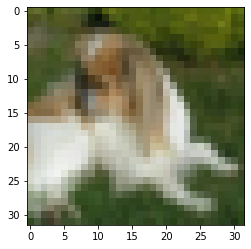

In [5]:
sd=images_train[0].reshape(3, 32, 32).transpose(1,2,0)
print("Label : ",label_names[labels_train[0]])
plt.imshow(sd)

# Normalization(Preprocessing)

To normalize or to rescale, we will use Min-Max Normalization 

y = (x-min) / (max-min)


By applying Min-Max normalization, the original image data is going to be transformed in range of 0 to 1 .

But since we know array contains values of rgb channels, it can have values between 0 and 255 only. So if we divide every value by 255, we will get value between 0 and 1 only. We use this information to normalize the data.

In [6]:
print("Before normalization :\n",images_test[0])
images_train=images_train/255
images_validation=images_validation/255
images_test=images_test/255
print("After normalization :\n",images_test[0])

Before normalization :
 [158 159 165 ... 124 129 110]
After normalization :
 [0.61960784 0.62352941 0.64705882 ... 0.48627451 0.50588235 0.43137255]


# Fitting training data on Linear SVM classifier

Using Scikit Learn's SVM() classifier with linear kernel

In [7]:
svclassifier =SVC()
svclassifier.fit(images_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Testing on validation data

In [8]:
y_pred = svclassifier.predict(images_validation)
acc1=metrics.accuracy_score(labels_validation,y_pred)
print("Accuracy score for validation data: ",acc1)

Accuracy score for validation data:  0.413


### Experimenting for different C values(hyperparameter)

Using Scikit's GridSearchCV which performs exhaustive search over specified parameter values for an estimator.

In [9]:
c_values=[1, 10,100]
param_grid = [  {'C': c_values}, ]
svclassifier = SVC()
grid_search = GridSearchCV(svclassifier,  param_grid,scoring="accuracy",n_jobs=-1)
grid_search.fit(images_train,labels_train)
acc_values=list(grid_search.cv_results_["mean_test_score"])
for c,acc in zip(c_values,acc_values):
  print("Accuracy for c = ",c,"is : ",acc)

Accuracy for c =  1 is :  0.413
Accuracy for c =  10 is :  0.41575000000000006
Accuracy for c =  100 is :  0.41425


### 'C' value vs accuracy plot

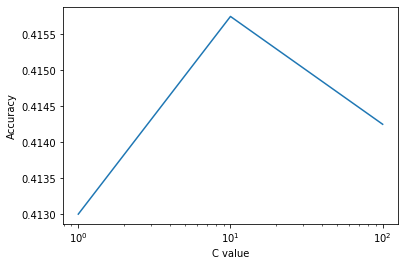

In [10]:
plt.plot(c_values,acc_values)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.show()

### Optimal C value: 

In [11]:
max_acc_index=acc_values.index(max(acc_values))
optimal_c=c_values[max_acc_index]
print("Optimal value of C : ",optimal_c)
svclassifier = SVC(kernel='linear',C=optimal_c)
svclassifier.fit(images_train, labels_train)

Optimal value of C :  10


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Significance of C

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

Large Value of parameter C -> small margin

Small Value of paramerter C -> Large margin

![alt text](https://miro.medium.com/max/591/0*z00-0ici9ikQLBug.jpg)

There is no rule of thumb to choose a C value, it totally depends on dataset. Try with bunch of different values and choose the value which gives the lowest misclassification rate on testing data. 

# Support vector images

3721


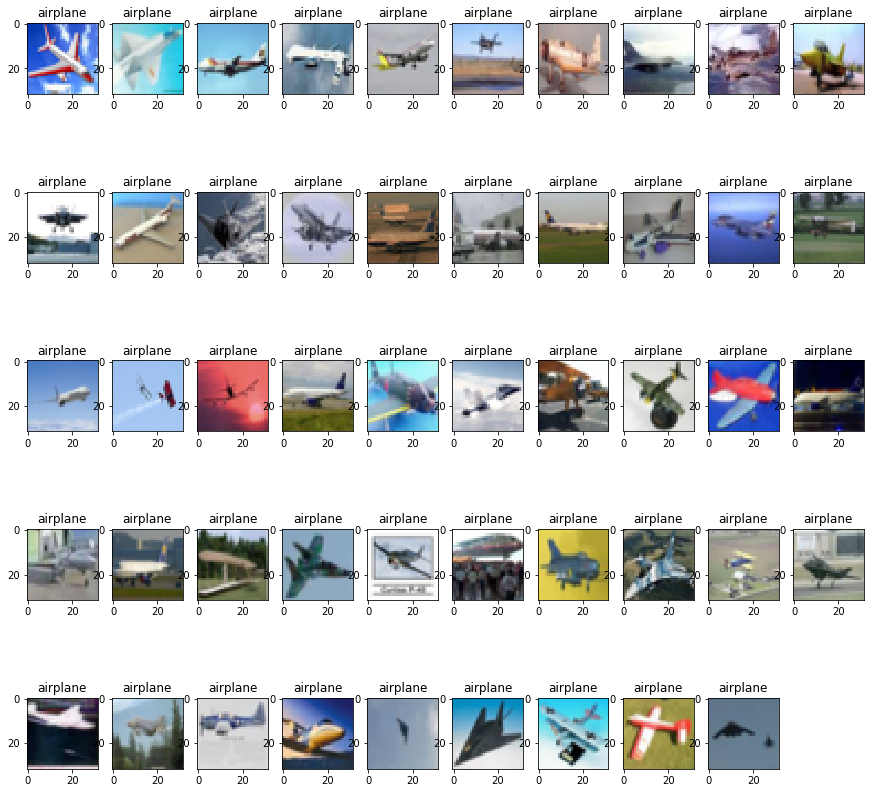

In [12]:
cntr=1
w=18
h=int(len(svclassifier.support_)/10)+1
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 5
ax = []
warnings.filterwarnings("ignore")
print(len(svclassifier.support_vectors_))
for i,j in zip(svclassifier.support_vectors_,svclassifier.support_):
  fig.add_subplot(rows, columns, cntr)
  ax.append( fig.add_subplot(rows, columns, cntr) )
  ax[-1].set_title(label_names[labels_train[j]])  # set title
  sd=i.reshape(3, 32, 32).transpose(1,2,0)
  # print("Label : ",label_names[labels_train[j]])
  plt.imshow(sd)
  cntr+=1
  if cntr==columns*rows:break
  

#Testing on test data

In [0]:
y_pred2 = svclassifier.predict(images_test)

### Accuracy:

In [14]:
optimal_accuracy_svc=metrics.accuracy_score(labels_test,y_pred2)
print(optimal_accuracy_svc)

0.296


### F1 Score:

In [15]:
print(metrics.f1_score(labels_test,y_pred2,average=None))

[0.33377021 0.37202525 0.22580645 0.20950533 0.26561044 0.21058091
 0.30624655 0.31152287 0.42532146 0.30769231]


### Confusion Matrix:

In [16]:
print(metrics.confusion_matrix(labels_test,y_pred2))

[[382  47 100  48  45  43  31  60 195  49]
 [ 94 383  64  55  60  67  42  30  77 128]
 [115  46 259  94 159  95  92  77  43  20]
 [ 85  77 156 216 107 153  88  50  34  34]
 [ 75  33 201 108 285  95  94  70  23  16]
 [ 95  45 161 161 117 203  77  75  46  20]
 [ 32  50 131 168 143 108 277  43  20  28]
 [ 82  57 115 108 158  84  47 269  33  47]
 [196  99  66  45  29  34  20  15 430  66]
 [133 222  41  59  43  46  41  38 121 256]]


# Comparison with KNN

In [0]:
def knn(k,images_train,images_test,labels_train):
    ans_labels=[]
    for i in range(len(images_test)):
        dist_label_list=[]
        label_list=[]
        
        for j in range(len(images_train)):
            dist=np.linalg.norm(images_train[j]-images_test[i])
            label=labels_train[j]
            dist_label_list.append(  [dist,label]  )

        dist_label_list.sort()
        dist_label_list=dist_label_list[:k]
        
        for l in dist_label_list:
            label_list.append(l[1])
        
        label_set=set(label_list)
        pred_label=max(label_set,key=label_list.count)
        ans_labels.append(pred_label)
    return ans_labels

### Finding optimal k value

In [18]:
optimal_accuracy,optimal_k = 0 , 1
klist,acclist=[],[]
for i in range(1,15,2):
    ans_labels=knn(i,images_train,images_validation,labels_train)
    accuracy=metrics.accuracy_score(labels_validation,ans_labels)
    print("For k = " ,i,", accuracy : ", accuracy)
    klist.append(i)
    acclist.append(accuracy)
    if(accuracy>optimal_accuracy): optimal_accuracy , optimal_k = accuracy , i
print("Optimal k value : ",optimal_k)
labels_test_knn=knn(optimal_k,images_train,images_test,labels_train)
optimal_accuracy_knn=metrics.accuracy_score(labels_test,labels_test_knn)


For k =  1 , accuracy :  0.283
For k =  3 , accuracy :  0.268
For k =  5 , accuracy :  0.287
For k =  7 , accuracy :  0.293
For k =  9 , accuracy :  0.28
For k =  11 , accuracy :  0.281
For k =  13 , accuracy :  0.282
Optimal k value :  7


### K value vs accuracy plot

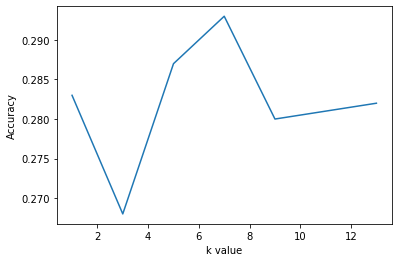

In [19]:
plt.plot(klist,acclist)
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

Performance comparison of knn vs Linear SVM

In [20]:
print("Accuracy with knn : ",optimal_accuracy)
print("Accuracy with linear svm : ",optimal_accuracy_svc)

Accuracy with knn :  0.293
Accuracy with linear svm :  0.296
